# Characterization of Systems in the Spectral Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Phase and Group Delay

The [phase and group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay) characterize the phase and delay properties of an LTI system. Both quantify the frequency dependent delay that is imprinted on a signal when passing through a system. In many applications the delay introduced by a system should be as small as possible or within reasonable limits.

### Phase Delay

For an LTI system with transfer function $H(j \omega)$ the phase delay is defined as follows

\begin{equation}
t_p(\omega) = - \frac{\varphi(j \omega)}{\omega}
\end{equation}

where $\varphi(j \omega) = \arg \{ H(j \omega) \}$ denotes the phase of the transfer function. The phase delay quantifies the delay of a single harmonic exponential signal $e^{j \omega t}$ with frequency $\omega$ when passing through the system. The negative sign in the definition of the phase delay results in a positive phase delay $t_p(\omega) > 0$ when a signal is delayed by a system. Note that the phase delay may not be defined for $\omega = 0$.

**Example**

As example, the phase delay $t_p(\omega)$ is computed for the [2nd order low-pass filter introduced before](../laplace_transform/network_analysis.ipynb#Example:-Second-Order-Low-Pass-Filter). First the transfer function $H(j \omega)$ is defined in `SymPy`

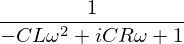

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

L, R, C = sym.symbols('L R C', positive=True)
w = sym.symbols('omega', real=True)
s = sym.I * w

H = 1 / (C*L*s**2 + C*R*s + 1)
H

Now the phase delay $t_p(\omega)$ is computed

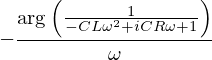

In [2]:
phi = sym.arg(H)
tp = - phi/w
tp

and the result is visualized using the normalized values $R=1$, $L=0.5$ and $C=0.4$ for the elements of the low-pass filter

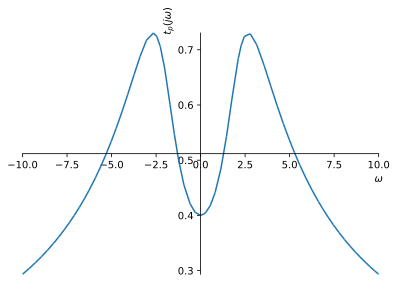

In [3]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
sym.plot(tp.subs(RLC), (w, -10, 10), xlabel='$\omega$', ylabel='$t_p(j \omega)$');

### Group Delay

The group delay is defined as the derivative of the phase with respect to the frequency

\begin{equation}
t_g(\omega) = - \frac{d \varphi(j \omega)}{d \omega}
\end{equation}

The group delay quantifies the delay the amplitude envelope of a group of exponential signals observes when passing through a system. The negative sign in above definition results in a positive group delay for a system imposing a delay onto the input signal. Note that the [phase](https://en.wikipedia.org/wiki/Instantaneous_phase) $\varphi(j \omega)$ is in general only unique for $- \pi < \varphi(j \omega) \leq \pi$. If the phase exceeds this range it is wrapped back. For meaningful results it is required to unwrap the phase before computing the group delay.

**Example**

The group delay $t_g(\omega)$ of above 2nd order low-pass filter is computed and plotted for the normalized values

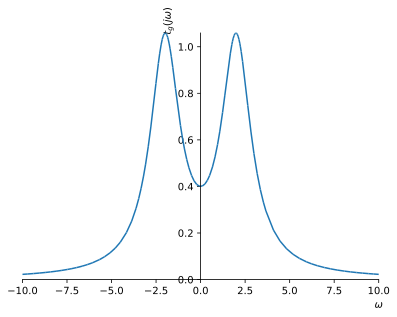

In [4]:
tg = - sym.diff(phi, w)
sym.plot(tg.subs(RLC), (w, -10, 10), xlabel='$\omega$', ylabel='$t_g(j \omega)$');

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.